# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [6]:
data.shape

(5391, 6)

In [7]:
data.isna().values.any()

False

In [8]:
data.duplicated().values.any()

False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
chars_to_remove = [',', '$']
col_to_replace = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

# nested loop for each column and each data:
for col in col_to_replace:
  for char in chars_to_remove:
    data[col] = data[col].astype(str).str.replace(char, '')

  # convert to numeric type
  data[col] = pd.to_numeric(data[col])

<ipython-input-10-c1b2d93faf8a>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, '')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [12]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [13]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [15]:
print(f'The highest production budget film is:\n {data[data["USD_Production_Budget"] == 425000000][["Movie_Title", "USD_Production_Budget"]]}')

print(f'The highest worldwide gross revenue film is:\n {data[data["USD_Worldwide_Gross"] == 2783918982][["Movie_Title", "USD_Worldwide_Gross"]]}')

The highest production budget film is:
      Movie_Title  USD_Production_Budget
3529      Avatar              425000000
The highest worldwide gross revenue film is:
      Movie_Title  USD_Worldwide_Gross
3529      Avatar           2783918982


In [16]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [17]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'The number of films that grossed $0 domestically is {zero_domestic.Movie_Title.count()}')
# or use 'len(zero_domestic)' instead


zero_domestic.sort_values('USD_Production_Budget', ascending=False).head()

The number of films that grossed $0 domestically is 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [18]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'The number of films that grossed $0 domestically is {len(zero_worldwide)}')


zero_worldwide.sort_values('USD_Production_Budget', ascending=False).head()

The number of films that grossed $0 domestically is 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [19]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_releases)}')

international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [20]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')

international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [22]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [23]:
# remove the films that haven't been released
data_clean = data.drop(future_releases.index)
data_clean.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [24]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
losing_percentage = "{:.2%}".format(len(money_losing)/len(data_clean))

# money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
# money_losing.shape[0]/data_clean.shape[0]

print(f"The percentage of films where the production costs exceeded the worldwide gross revenue is: {losing_percentage}")

The percentage of films where the production costs exceeded the worldwide gross revenue is: 37.28%


# Seaborn for Data Viz: Bubble Charts

In [25]:
import seaborn as sns

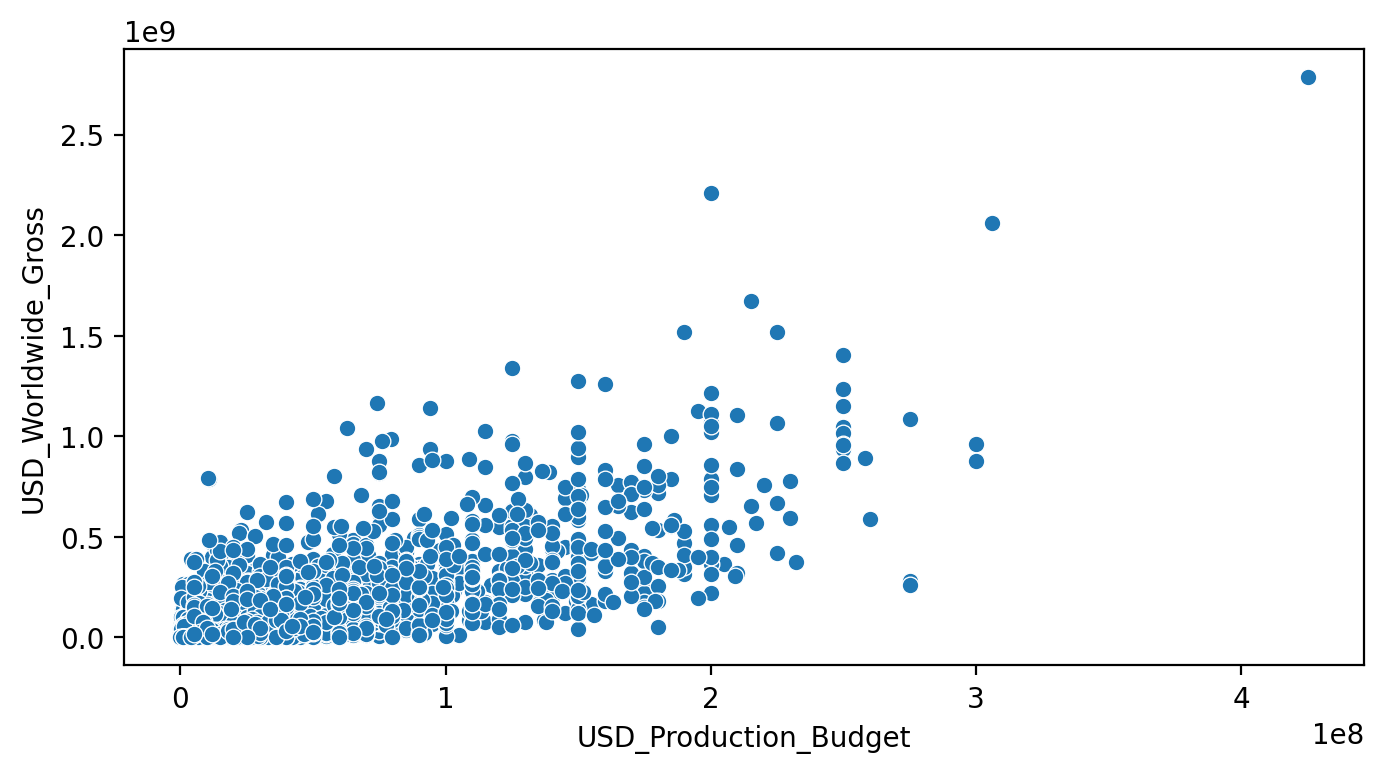

In [26]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=data_clean, x='USD_Production_Budget', y="USD_Worldwide_Gross")
plt.show()

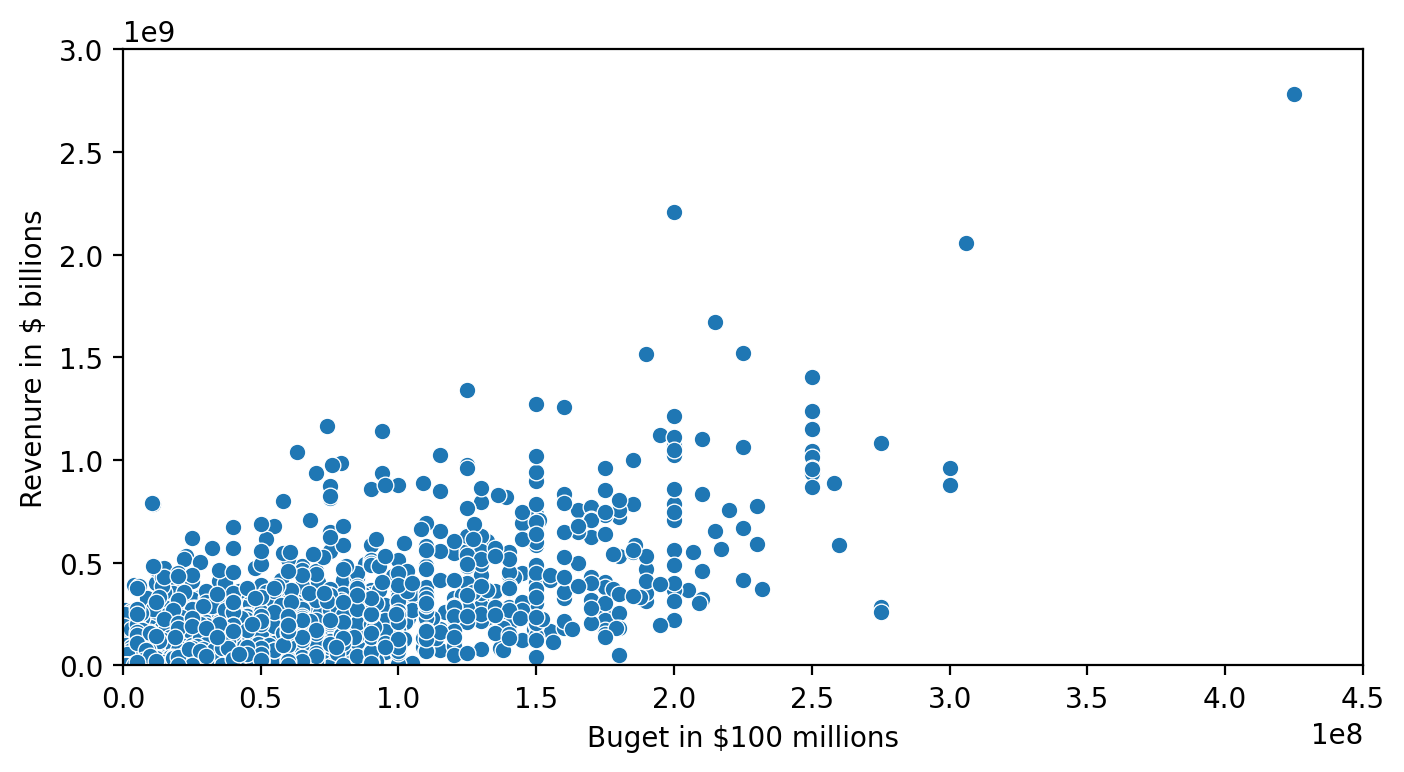

In [27]:
# make a configuration
plt.figure(figsize=(8,4), dpi=200)
axe = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y="USD_Worldwide_Gross")
axe.set(ylim=(0, 3000000000), xlim=(0, 450000000), ylabel='Revenure in $ billions', xlabel="Buget in $100 millions")
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



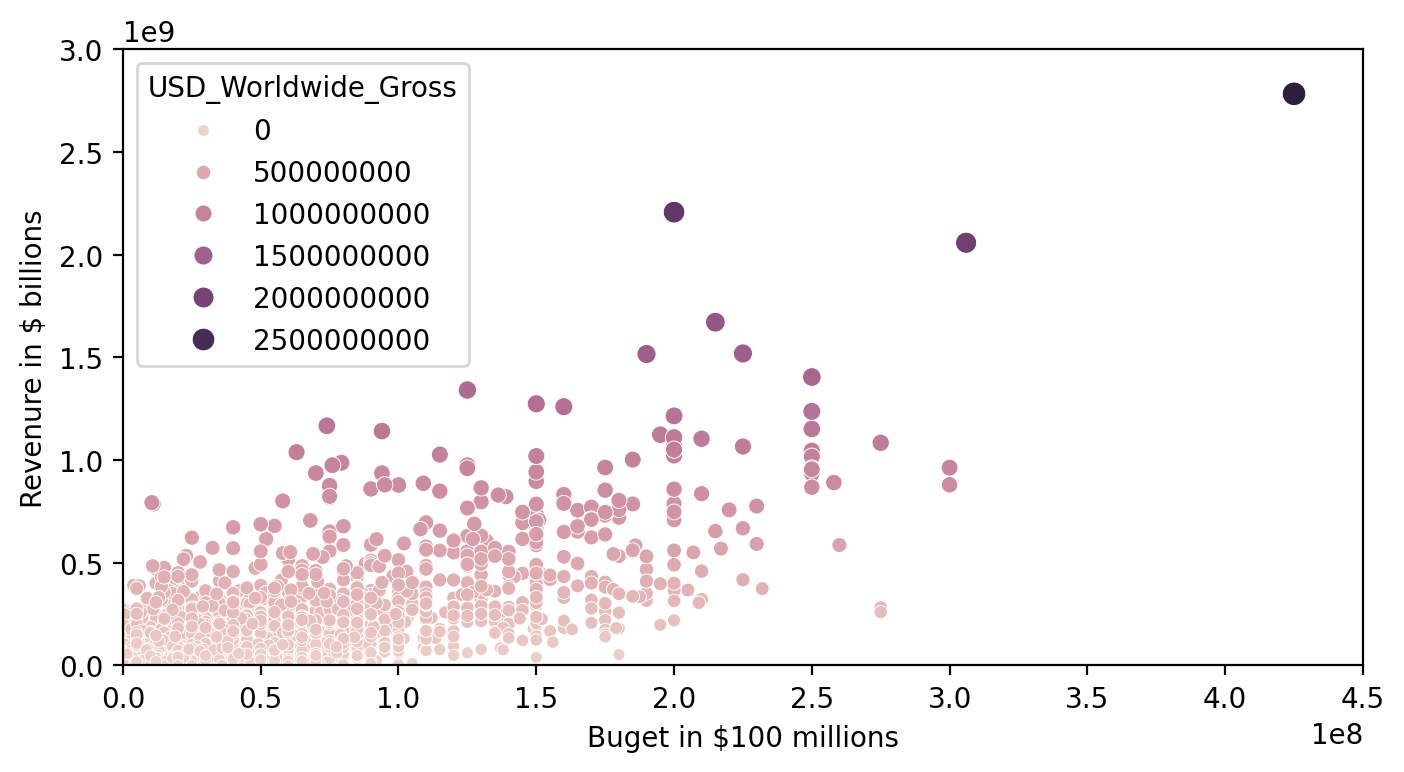

In [28]:
# bubble chart
plt.figure(figsize=(8,4), dpi=200)
axe = sns.scatterplot(data=data_clean, x='USD_Production_Budget',
                      y="USD_Worldwide_Gross",
                      hue="USD_Worldwide_Gross", # colour
                      size="USD_Worldwide_Gross") # dot size
axe.set(ylim=(0, 3000000000), xlim=(0, 450000000),
        ylabel='Revenure in $ billions',
        xlabel="Buget in $100 millions")
plt.show()

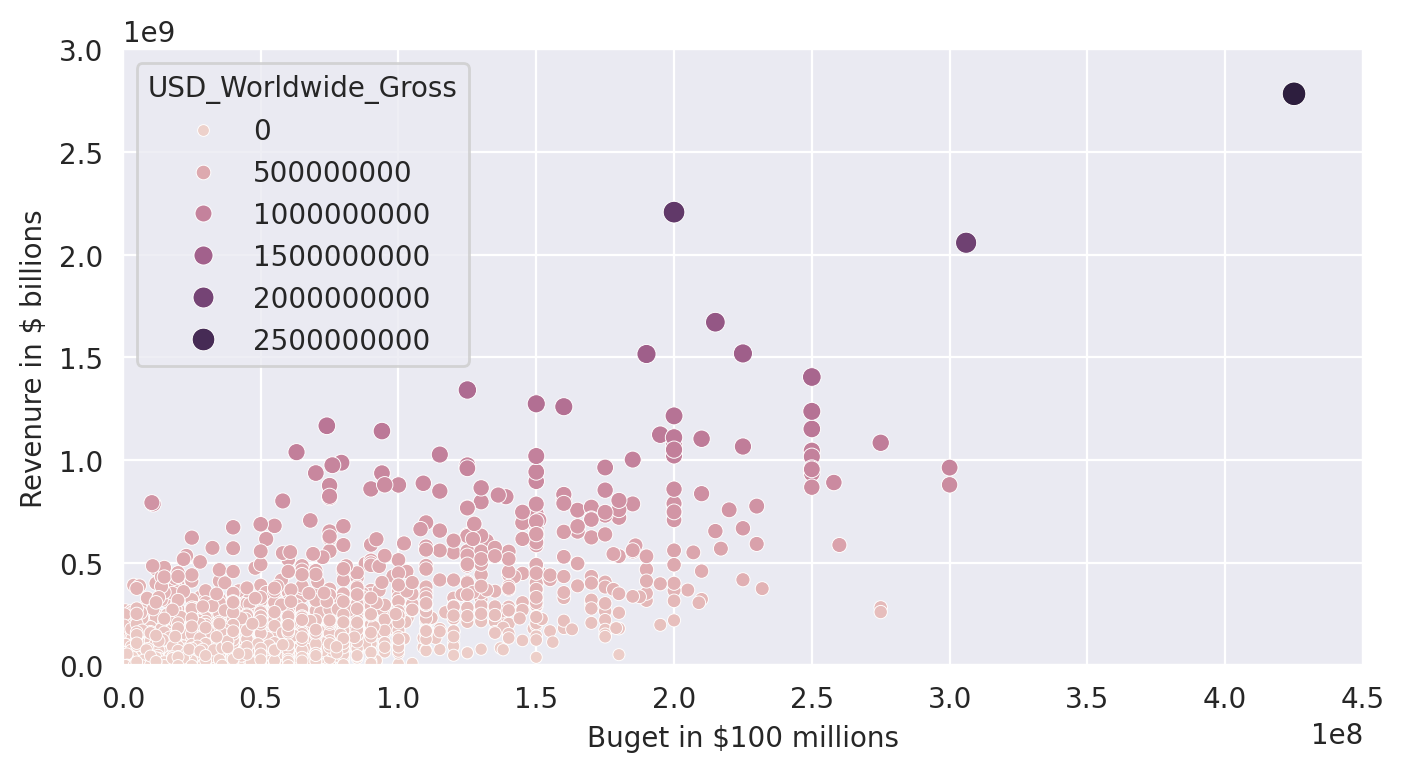

In [32]:
plt.figure(figsize=(8,4), dpi=200)

# styling bg of chart by using 'with'
with sns.axes_style('darkgrid'):

  axe = sns.scatterplot(data=data_clean, x='USD_Production_Budget',
                      y="USD_Worldwide_Gross",
                      hue="USD_Worldwide_Gross", # colour
                      size="USD_Worldwide_Gross") # dot size
  axe.set(ylim=(0, 3000000000), xlim=(0, 450000000),
        ylabel='Revenure in $ billions',
        xlabel="Buget in $100 millions")
  plt.show()

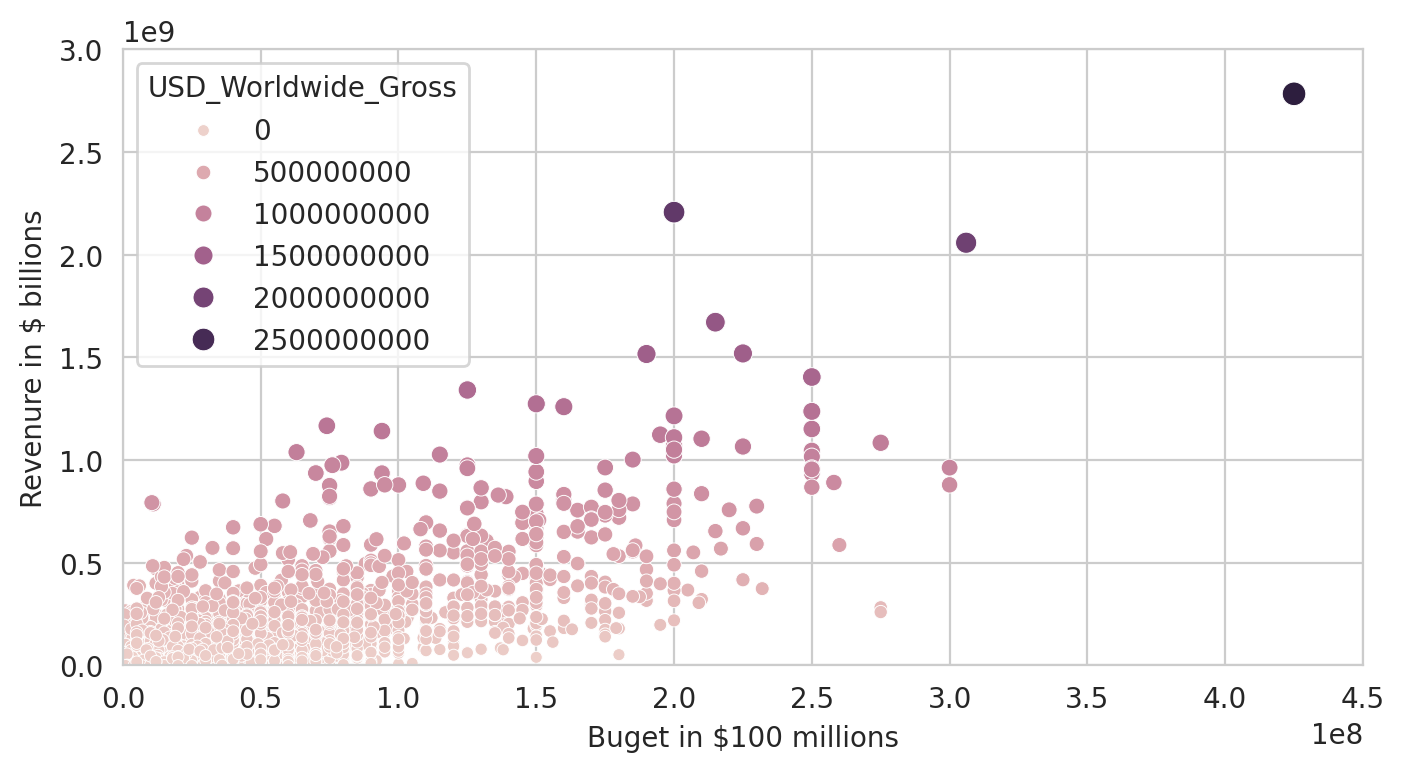

In [37]:
# several styles: styles = ["white", "dark", "whitegrid", "darkgrid", "ticks"]
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):

  axe = sns.scatterplot(data=data_clean, x='USD_Production_Budget',
                      y="USD_Worldwide_Gross",
                      hue="USD_Worldwide_Gross", # colour
                      size="USD_Worldwide_Gross") # dot size
  axe.set(ylim=(0, 3000000000), xlim=(0, 450000000),
        ylabel='Revenure in $ billions',
        xlabel="Buget in $100 millions")
  plt.show()

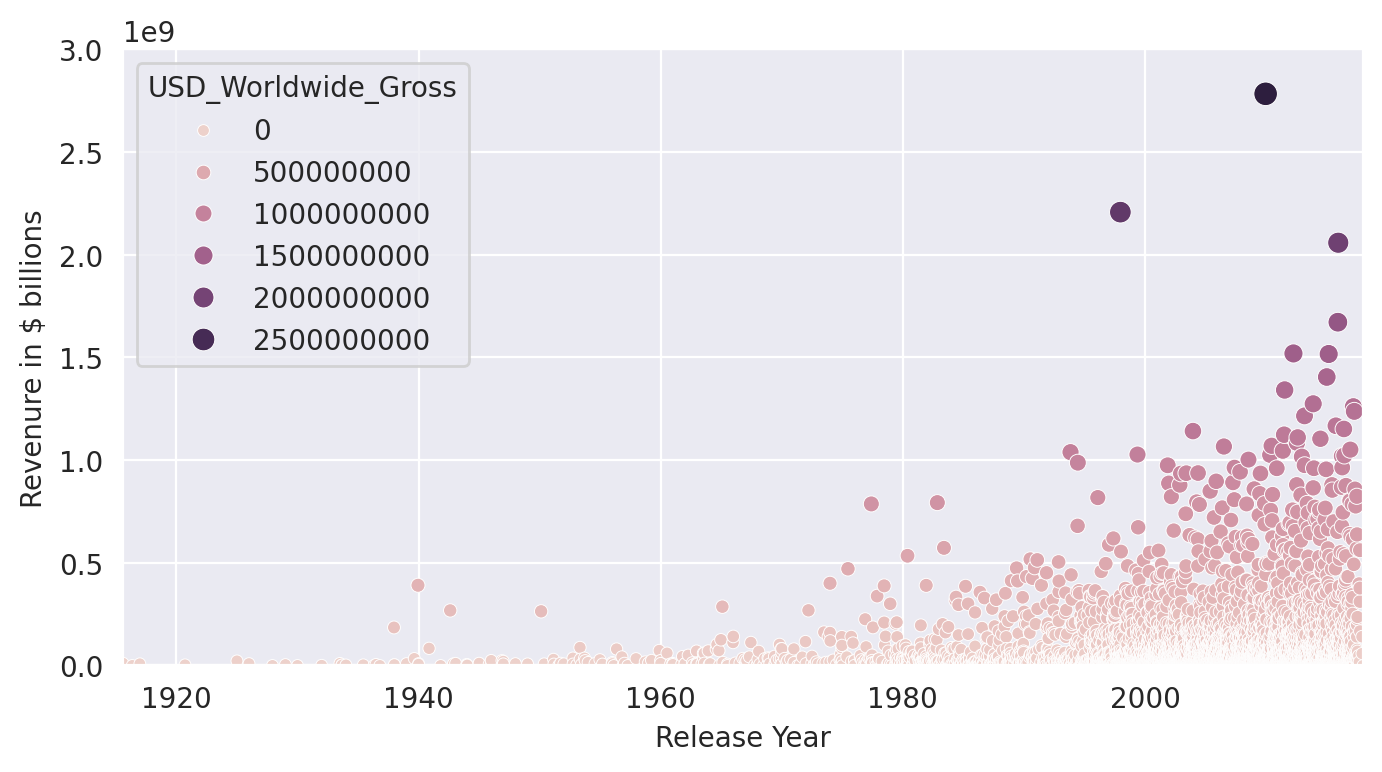

In [40]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):

  axe = sns.scatterplot(data=data_clean, x='Release_Date',
                      y="USD_Worldwide_Gross",
                      hue="USD_Worldwide_Gross",
                      size="USD_Worldwide_Gross")
  axe.set(ylim=(0, 3000000000),
        xlim=(data_clean.Release_Date.min(),
           data_clean.Release_Date.max()),
        ylabel='Revenure in $ billions',
        xlabel="Release Year")
  plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [42]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
print(years)

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


In [44]:
decades = years//10*10
data_clean['Decade'] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [45]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [46]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

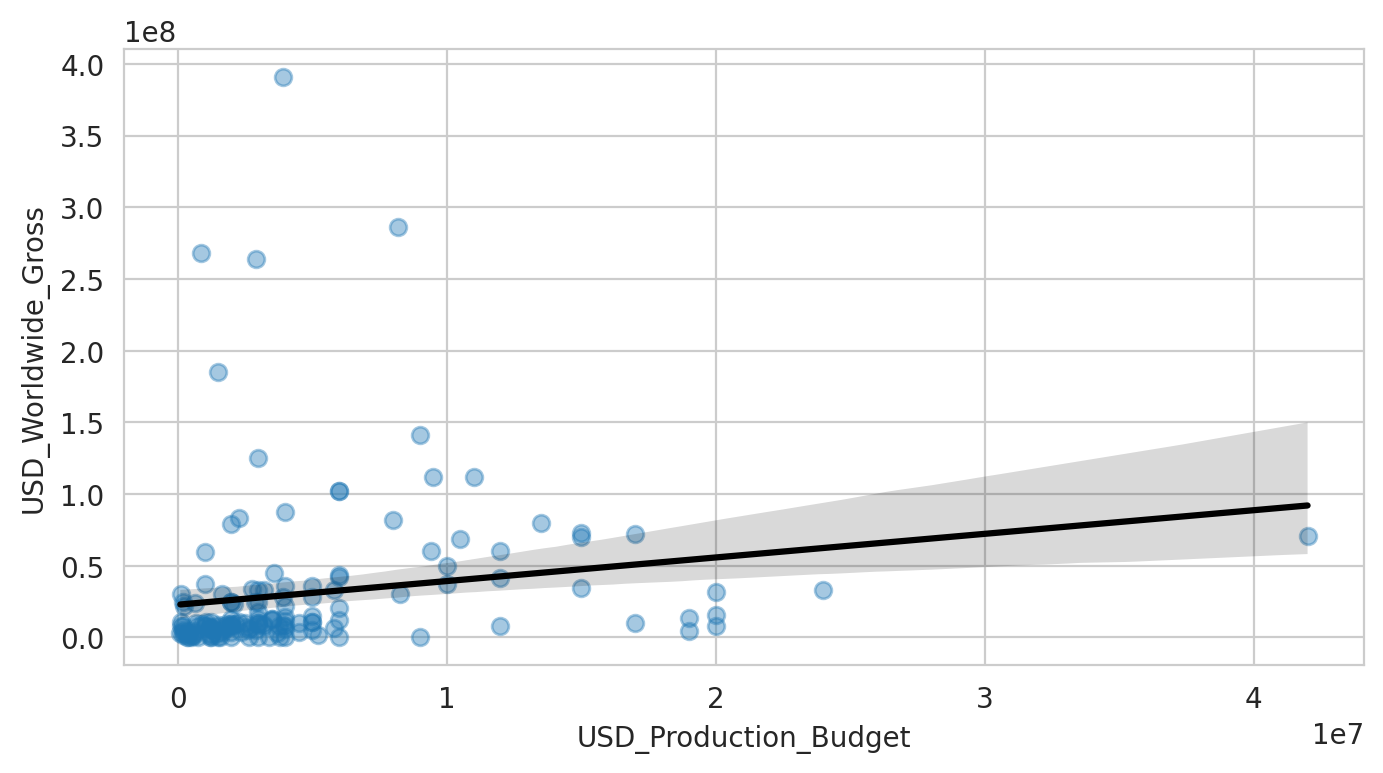

In [47]:
# .regplot() function
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=old_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        scatter_kws={'alpha':0.4},
        line_kws={'color':"black"})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

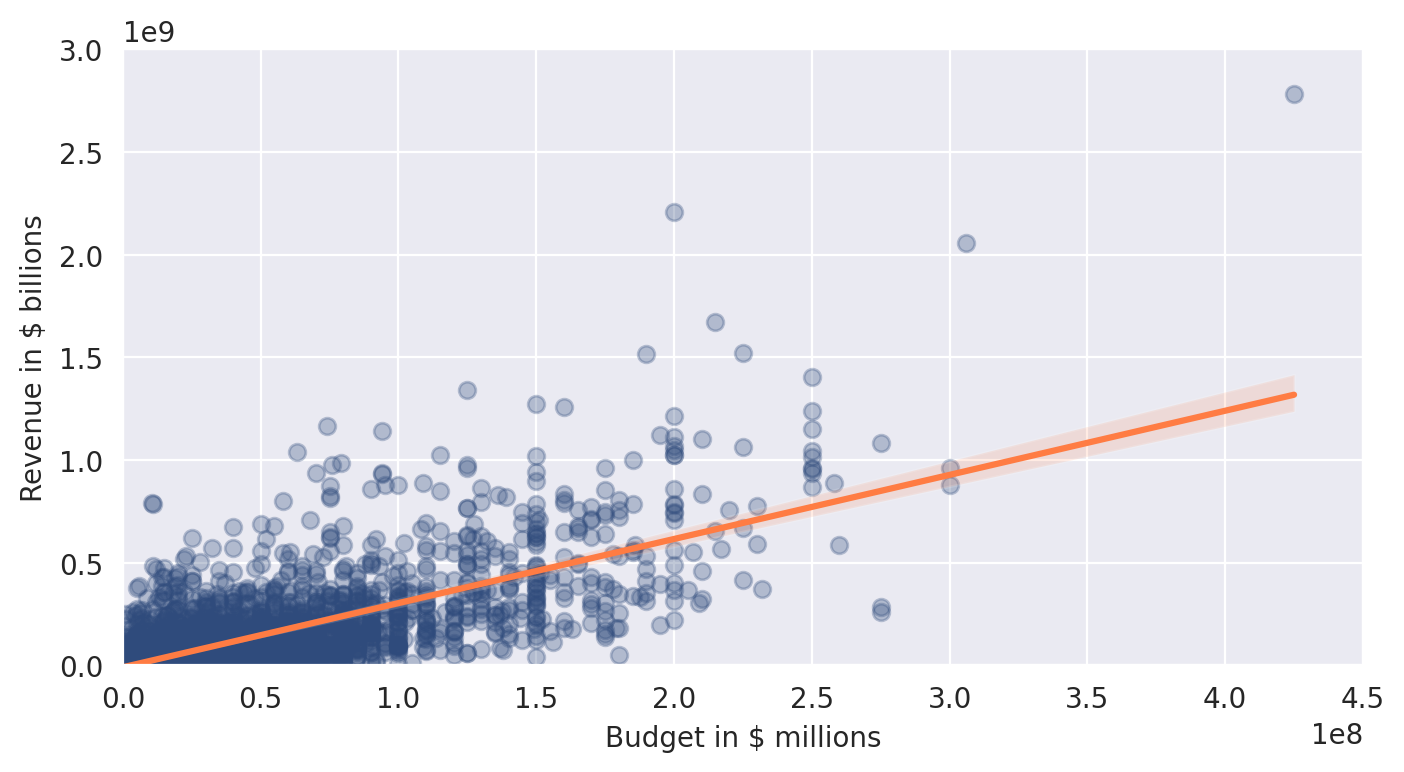

In [51]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        color='#2f4b7c',
        scatter_kws={'alpha':0.3},
        line_kws={'color':"#ff7c43"})
  ax.set(ylim=(0, 3000000000),
      xlim=(0, 450000000),
      ylabel='Revenue in $ billions',
      xlabel='Budget in $ millions')
  plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [53]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [54]:
regression = LinearRegression()

In [58]:
# Explanatory Variable(s) or Feature(s)
x = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [59]:
# Find the best-fit line
regression.fit(x, y)

LinearRegression()

In [60]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [61]:
# Theta one
regression.coef_

array([[3.12259592]])

In [62]:
# R-squared
regression.score(x, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [63]:
x2 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y2 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(x2, y2)

print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The R-squared is: {regression.score(x2, y2)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The R-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [65]:
#1
22821538 + 1.64771314 * 350000000

599521137.0

In [68]:
#2
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0] * budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 million film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 million film is around $600000000.0.
